**Shifted Ackley Function**

Environment : Python 3.8.2 & Jupyter Notebook<br>

The objective is to solve unconstrained problem : F6 as described in the “CEC2008_TechnicalReport.pdf” for both dimensions D = 50 and D = 500. <br>
F6: Shifted Ackley <br>

The coordinates of the shifted global minimum of this function in dim = 1000 are provided in a numpy array in a data file "data.py". These are the target coordinates to be achieved.<br>
F6: ackleydat -> shape = (1000,) <br>

The fitness or value of this function at its minimum is also available in numpy array "f_bias" in "data.py". This is the the target fitness value to achieve.<br>
f_bias[5] = F6_min = -140
<img src="Functions.png">

Import Libraries

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from pygmo import *

**Import Data**

In [2]:
# Import data in data.py file and print shape of input arrays
from data import *
print(ackleydat.shape)
print(f_bias[5])

(1000,)
-140.0


- Algorithm : Genetic Algorithm - The shifted Ackley function is multimodal and as such requires a heuristic-based algorithm that takes advantage of natural selection to avoid local minima.
- Libraries : PyGMO
- Parameters of the algorithm : Number of individuals, number of generations 
- Stopping criterion : number of generations = specified number
- Number of function evaluations : see below
- Computational time : see below
- Convergence curve : see below
- Final results (solution and fitness) : see below

In [5]:
# Define objective function to minimize
def Shifted_Ackley(x):
    z = np.subtract(x[:dim], ackleydat[:dim])
    s1 = np.sum(np.power(z, 2))
    s2 = np.sum(np.cos(2*np.pi*z))
    return f_bias[5] - 20*np.exp(-0.2*np.sqrt(s1/dim)) - np.exp(s2/dim) + 20 + np.exp(1)


# Define user-defined problem (udp) classes that implement methods describing the optimization problems.
# Classes to be used to construct an instance of pygmo.problem class

# fitness() method returns the fitness of the input
# get_bounds() returns the box bounds of the problem or search space

class shifted_ackley:
    def fitness(self, x):
        return [Shifted_Ackley(x)]
    def get_bounds(self):
        return ([-32]*dim, [32]*dim)


def Minimize_GA(input_prob=None, popsize=None, generations=None, targetmin=None):
    
    print("Number of dimensions : {}".format(dim))
        
    since = time.time()
    
    # Instanciate simple genetic algorithm class of pygmo library
    simple_gen_algo = sga(gen = generations, cr = .90, eta_c = 1., m = 0.02,\
                          param_m = 1., param_s = 2, crossover = "exponential",\
                          mutation = "polynomial", selection = "tournament", seed = 100)
    
    # Intanciate optimization algorithm class
    algo = algorithm(simple_gen_algo)
    
    # Set algorithm verbosity - 1 for logging outputs at each generation
    algo.set_verbosity(1)
    
    # Construct an instance of pygmo.problem class by overriding specific methods with those implemented in
    # input user-defined problem class
    prob = problem(input_prob())
    
    # Generate a population of potential candidate solutions of size=popsize to solve prob
    pop = population(prob, size=popsize, seed=100)
    
    # Core of the optimization - selection + crossover + mutation + insertion over specified number of generations
    pop = algo.evolve(pop)
    
    till = time.time()
    
    # Extract a reference to the internal user-defined algorithm
    uda = algo.extract(sga)
    
    # Log extraction
    log = uda.get_log()

    Gen, Fevals, Best_fitness, Improvement = [], [], [], []
    
    # Fetch cumulative number of function evaluatiions and best fitness at each generation
    for x in log:
        Gen.append(x[0])
        Fevals.append(x[1])
        Best_fitness.append(x[2])
        #Improvement.append(x[3])
    
    # Show results
    plt.plot(Gen, Best_fitness, label="Convergence curve")
    plt.axhline(y=targetmin, color="r", label="Actual Minimum = "+str(targetmin))
    plt.legend()
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.show()

    print("Computational time : {:.2f} s".format(till-since))
    print("Fitness at minimum (result): {:.4f} ".format(pop.champion_f[0]))
    print("Fitness at minimum (real): {:.4f} ".format(targetmin))
    print("Function evaluations : {}".format(Fevals[-1]))
    print("x_minimum :\n{}".format(pop.champion_x))

D = 50

Number of dimensions : 50


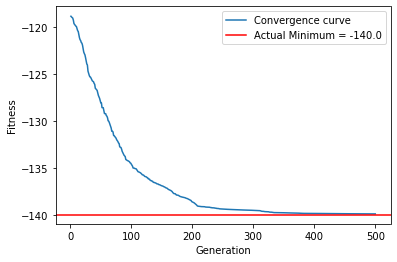

Computational time : 8.76 s
Fitness at minimum (result): -139.8533 
Fitness at minimum (real): -140.0000 
Function evaluations : 250000
x_minimum :
[ 27.02794888 -16.16198457   6.41174695  -0.78847427  23.52671315
  15.76616954  -2.64105125 -28.90073055  19.26552731  -3.29774311
   6.9215267   17.50994476  25.34393015  14.29000593 -19.36069695
  -5.6923969   26.10515623  25.01604946  -5.38984248  23.61207008
 -26.51744729  -8.80645244  18.80002515 -29.41385832 -21.65420325
 -17.87335854 -18.07005096   6.28804749 -13.68166247 -18.10084858
 -29.08021295  14.79581139  -3.33161356  25.91057279  -2.05525775
  -4.87430255  20.79034263   1.51960458 -17.81749646  10.3405447
  20.31011303 -28.85629833  10.9180438   -7.22715769  19.95740172
   0.19954593  12.59856888  -4.23940316 -11.69040249 -18.61959401]


In [6]:
dim = 50
Minimize_GA(input_prob=shifted_ackley, popsize=500, generations=500, targetmin=f_bias[5])

D = 500

Number of dimensions : 500


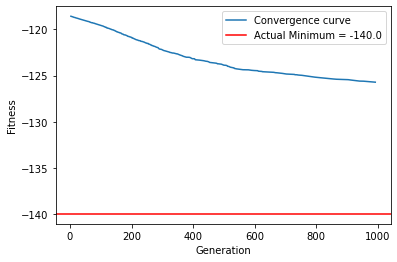

Computational time : 144.79 s
Fitness at minimum (result): -125.7751 
Fitness at minimum (real): -140.0000 
Function evaluations : 1984000
x_minimum :
[ 27.73508561 -17.18754051   6.66367169  -0.34738867  24.73958147
  16.52090467  -1.0100083  -24.59358586  20.67707125   8.07315745
   5.16198768  20.89414518  22.25273481  18.44814916 -19.50837392
  -3.02620535  24.19905275  27.26271219  -6.53020751  27.31300919
 -26.83669172 -10.62102563  18.05354432 -21.11181092 -22.32129637
 -19.02675866 -18.71269189   6.2873986  -19.57928083 -18.45464379
 -21.57937014  13.18759917  -0.82521075  24.1324945    6.79420171
  -6.70995948  25.64780649   6.6621677  -13.74871773  14.51965796
  16.12761205 -29.64759052  26.00056537 -19.24895094  12.99178168
 -12.86336445   7.57913509  -6.07159103 -10.19263797 -15.28988887
 -19.395613     3.82977589 -17.54070627   4.63851026 -17.76855656
   7.42721103  -5.5909629   25.78151329  26.55477      7.33994393
   0.28189787  21.3031637   20.43748668   3.67220713  10.

In [7]:
dim = 500
Minimize_GA(input_prob=shifted_ackley, popsize=2000, generations=1000, targetmin=f_bias[5])

The Genetic Algorithm gives sastisfactory results in 50 dimensions while not exceeding 5000D function evaluations. As expected however, convergence in higher dimensions is more computationally costly. Further parameter tuning may be required to achieve better results without increasing the function evaluations.